# TESS_AudioClassification

### Dataset Link:- https://www.kaggle.com/datasets/ejlok1/toronto-emotional-speech-set-tess

In [294]:
import librosa
import librosa.display
import IPython.display as ipd
import matplotlib.pyplot as plt
import numpy as np

from scipy.io import wavfile as wav

import pandas as pd
import os

In [295]:
audio_file = 'TESS_TorontoEmotionalSpeech_dataset/YAF_happy/YAF_bath_happy.wav'

In [296]:
ipd.Audio(audio_file)

In [297]:
# load audio files with librosa
data, sr = librosa.load(audio_file)

Text(0.5, 1.0, 'Audio Signal Using librosa')

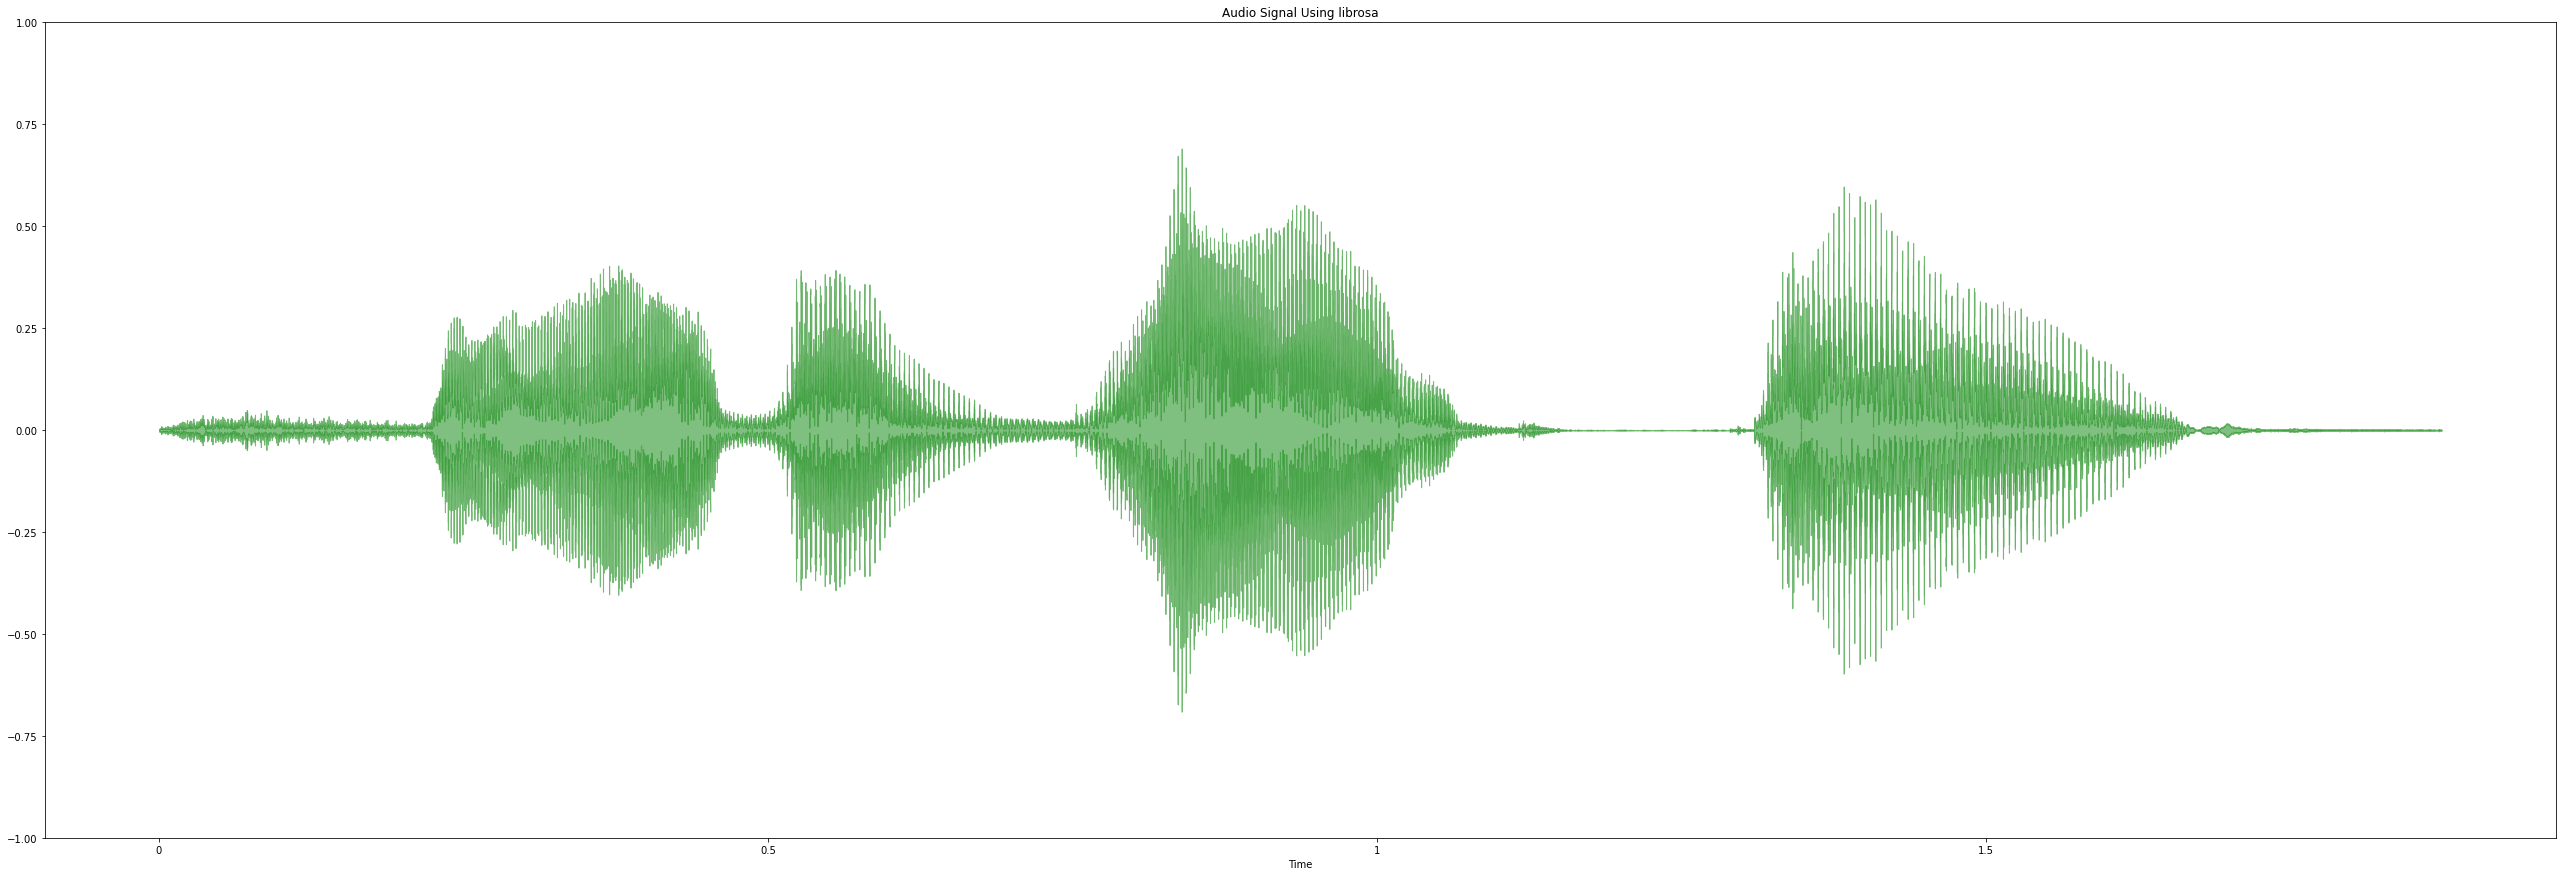

In [298]:
# visualize the waveform

plt.figure(figsize=(45, 15))

plt.subplot(1,1,1)
librosa.display.waveshow(data, alpha=0.5, color='g')
plt.ylim((-1, 1))
plt.title("Audio Signal Using librosa")

In [299]:
sr

22050

In [300]:
scipy_sr, scipy_data = wav.read(audio_file)

In [301]:
scipy_sr

24414

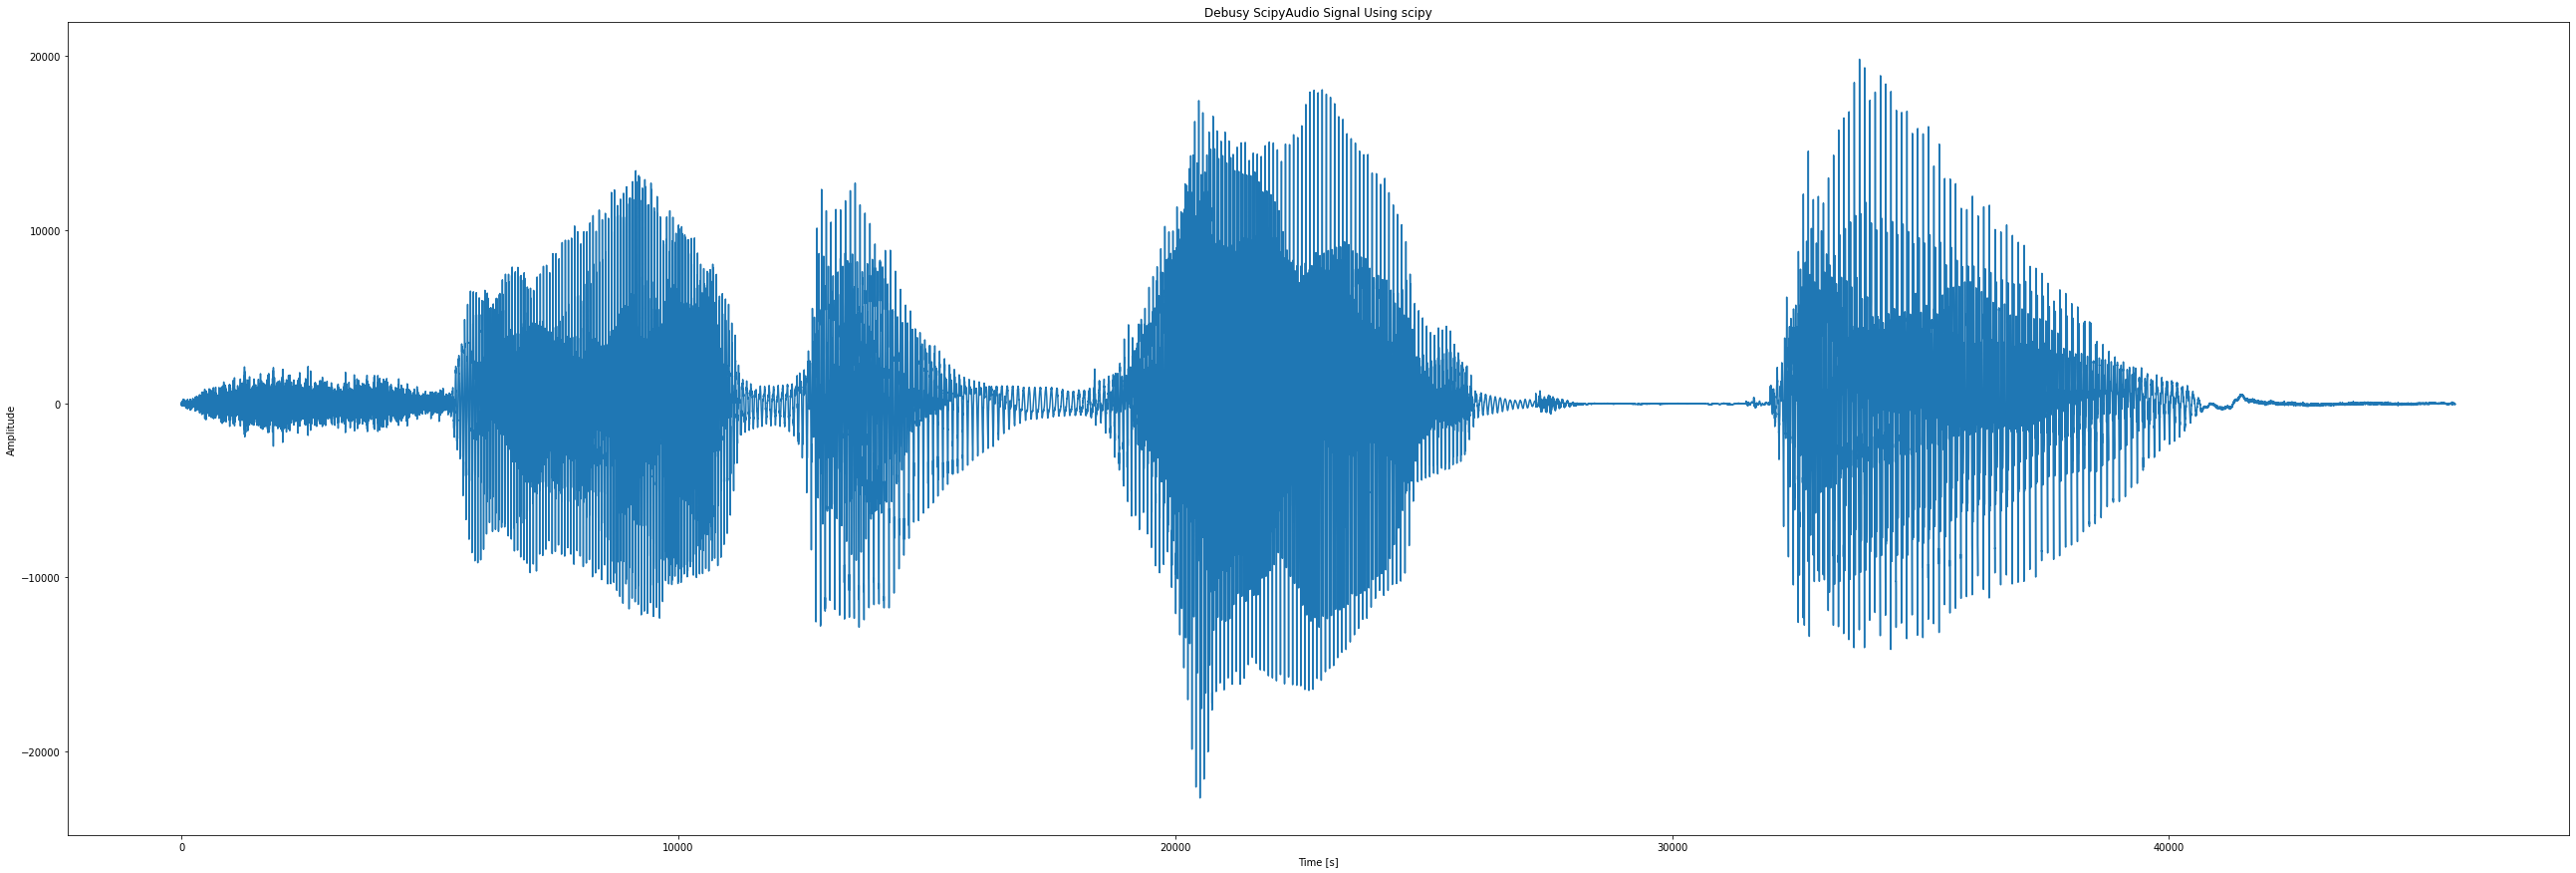

In [302]:
# visualize the waveform 

plt.figure(figsize=(45, 15))
plt.plot(scipy_data)
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')
plt.title("Debusy ScipyAudio Signal Using scipy")
plt.show()

### librossa_data vs scipy_data

In [303]:
data      ### amplitudes normalized btw. -1 & 1, mono audio

array([ 9.4960720e-05, -2.2447156e-03,  1.0570103e-03, ...,
       -1.8584753e-04, -6.1637291e-04,  0.0000000e+00], dtype=float32)

In [304]:
scipy_data    ### original amplitudes, stereo audio

array([ 18, -90,  30, ...,  -3, -27, -27], dtype=int16)

## checking whether dataset is imbalanced

In [305]:
base_folder = ('C:/11Drive/myCodes/audioSignalProcessingML/TESS_audioClassification/TESS_TorontoEmotionalSpeech_dataset/')
base_folder

'C:/11Drive/myCodes/audioSignalProcessingML/TESS_audioClassification/TESS_TorontoEmotionalSpeech_dataset/'

In [306]:
category_list = []
for i in range(len(os.listdir(base_folder))):
    new_folder = os.listdir(base_folder + os.listdir(base_folder)[i])
    category = os.listdir(base_folder)[i]
    audio_sample_count = len(new_folder)
    
    category_list.append([category, audio_sample_count])
    
category_list

[['OAF_angry', 200],
 ['OAF_disgust', 200],
 ['OAF_Fear', 200],
 ['OAF_happy', 200],
 ['OAF_neutral', 200],
 ['OAF_Pleasant_surprise', 200],
 ['OAF_Sad', 200],
 ['YAF_angry', 200],
 ['YAF_disgust', 200],
 ['YAF_fear', 200],
 ['YAF_happy', 200],
 ['YAF_neutral', 200],
 ['YAF_pleasant_surprised', 200],
 ['YAF_sad', 200]]

In [307]:
# Balanced dataset -> since equal no. of audio files of each category is present

## Vid#2

## Extracting features

## Mel Frequency Cepstral Coefficients(MFCC) -
        MFCC summarizes the frequency distribution across window size
        This way, we can analyse both freq. & time characteristics of the sound

In [308]:
mfccs = librosa.feature.mfcc(y=data, n_mfcc=13, sr=sr)

In [309]:
mfccs.shape

(13, 81)

In [310]:
mfccs

array([[-4.66044556e+02, -4.27986572e+02, -3.87715881e+02, ...,
        -5.14634644e+02, -5.17851318e+02, -5.32554565e+02],
       [-3.96469955e+01, -6.16301270e+01, -5.20980110e+01, ...,
        -1.96043472e+01, -1.23135891e+01,  1.24790382e+00],
       [ 8.28018951e+01,  7.32040253e+01,  5.93740540e+01, ...,
         1.03258677e+01,  3.15006018e+00,  2.26997209e+00],
       ...,
       [-2.10553193e+00, -8.48753273e-01, -3.98211956e+00, ...,
         6.15364361e+00,  6.13415337e+00,  1.03472595e+01],
       [ 4.70900059e+00,  7.55870867e+00,  7.41492844e+00, ...,
         3.65399420e-01,  5.02606630e-01,  3.98417020e+00],
       [-2.76115346e+00,  8.54758918e-01,  7.07413530e+00, ...,
         1.28970995e+01,  1.18042850e+01,  2.34292889e+00]], dtype=float32)

### Visualizing MFCC

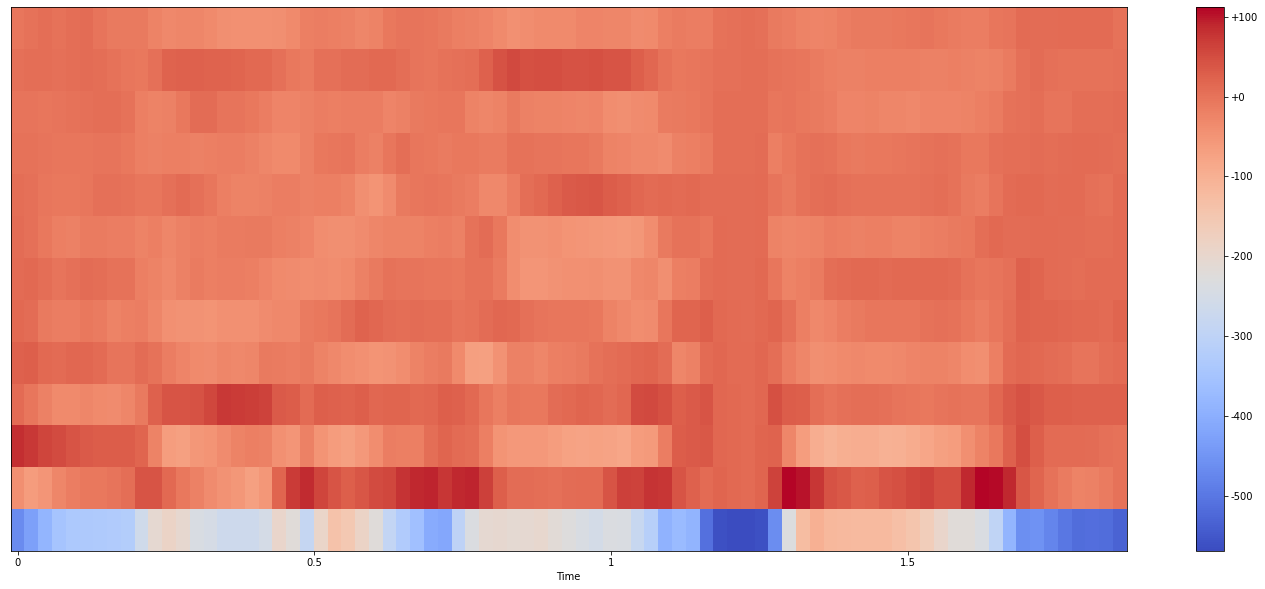

In [311]:
plt.figure(figsize=(25, 10))
librosa.display.specshow(mfccs, 
                         x_axis="time", 
                         sr=sr)
plt.colorbar(format="%+2.f")
plt.show()

## Extracting MFCC for all audio files

In [312]:
audio_dataset_path = base_folder
audio_dataset_path

'C:/11Drive/myCodes/audioSignalProcessingML/TESS_audioClassification/TESS_TorontoEmotionalSpeech_dataset/'

In [313]:
def feature_extractor(file):
    audio, sample_rate = librosa.load(file, res_type='kaiser_fast')
    mfccs_feature = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
    mfccs_scaled_feature = np.mean(mfccs_feature.T, axis=0)
    
    return mfccs_scaled_feature

In [314]:
# iterating through all the files to extract MFCC
from tqdm import tqdm    # here used to see progress
extracted_features = []

for folder_name in (os.listdir(base_folder)):
    new_path = os.path.join(base_folder, folder_name)
    for file in os.listdir(new_path):
        file_path = os.path.join(new_path, file)
        
        class_label = ((file.split('_')[2]).split('.'))[0]
#         print(file_path)
#         print(class_label)
        new_data = feature_extractor(file=file_path)
        extracted_features.append([new_data, class_label])


In [319]:
# converting the extracted_features list into pandas dataframe
extracted_features_df = pd.DataFrame(extracted_features, columns=['features', 'class'])

In [320]:
extracted_features_df

,features,class
0,"[-387.35645, 58.00525, -23.070848, -6.4950075,...",angry
1,"[-448.57208, 70.98286, -8.170729, -14.899887, ...",angry
2,"[-407.019, 33.079754, -11.734395, 6.1423593, -...",angry
3,"[-387.9774, 58.727615, -17.779144, -7.8950744,...",angry
4,"[-402.43118, 57.398098, -2.0817034, 13.913458,...",angry
...,...,...
2795,"[-396.6531, 68.68635, 27.67157, 49.48823, -8.8...",sad
2796,"[-409.28275, 83.23681, 19.076742, 46.272194, -...",sad
2797,"[-376.129, 73.641525, 30.505957, 48.876934, -1...",sad
2798,"[-427.49304, 75.27528, 23.589348, 43.188694, -...",sad


In [321]:
# splitting dataset into independent & dependent features

X = np.array(extracted_features_df['features'].to_list())
Y = np.array(extracted_features_df['class'].to_list())

In [322]:
X.shape

(2800, 40)

In [323]:
Y.shape

(2800,)

In [324]:
Y

array(['angry', 'angry', 'angry', ..., 'sad', 'sad', 'sad'], dtype='<U7')

In [325]:
### Label Encoding
# Y = np.array(pd.get_dummies(Y))

### Label Encoder
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
Y = to_categorical(labelencoder.fit_transform(Y))

In [326]:
Y

array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]], dtype=float32)

In [327]:
Y.shape

(2800, 7)

#### Train Test Split

In [328]:
# train test split
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

In [329]:
X_train

array([[-410.0664    ,   78.163376  ,   14.135646  , ...,   10.655197  ,
          11.617726  ,   10.150649  ],
       [-446.84714   ,   48.767162  ,    2.727876  , ...,    0.65106124,
          -0.55521554,    0.44902173],
       [-388.98938   ,   57.55276   ,   -3.9004424 , ...,    4.3385897 ,
           2.9602535 ,    4.8076444 ],
       ...,
       [-411.9594    ,   77.916534  ,  -17.241116  , ...,    4.0428267 ,
           3.4106946 ,    2.7567668 ],
       [-416.92215   ,   78.39715   ,   10.467284  , ...,    4.2241454 ,
           4.0469074 ,    2.815927  ],
       [-390.09805   ,   72.9611    ,   12.764098  , ...,    2.3778102 ,
           5.345522  ,    7.6702867 ]], dtype=float32)

In [330]:
X_train.shape

(2240, 40)

In [331]:
X_test

array([[-5.3174017e+02,  8.8013100e+01,  1.9886576e+01, ...,
         1.2676197e+01,  1.1587531e+01,  5.5031090e+00],
       [-3.9884421e+02,  6.6403717e+01, -1.2205502e+01, ...,
         7.9296951e+00,  1.1533680e+00,  5.2522349e-01],
       [-4.2752060e+02,  8.8234268e+01,  1.7150757e+01, ...,
         7.6283627e+00,  1.0508756e+01,  8.6808996e+00],
       ...,
       [-3.9246558e+02,  3.3412132e+01,  5.0733268e-01, ...,
         4.5844677e-01, -1.4955782e+00, -2.0606861e+00],
       [-4.4903897e+02,  4.6497028e+01,  3.7010977e+00, ...,
        -2.4863310e+00, -4.4267917e+00,  5.7779121e-01],
       [-3.1929282e+02,  2.4183647e+01, -2.3103970e+01, ...,
        -3.3197453e+00, -3.0839965e+00, -1.4446218e+00]], dtype=float32)

In [332]:
X_test.shape

(560, 40)

In [333]:
Y_train

array([[0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]], dtype=float32)

In [334]:
Y_train.shape

(2240, 7)

In [335]:
Y_test.shape

(560, 7)

## Model Creation

In [336]:
import tensorflow as tf

In [337]:
tf.__version__

'2.9.1'

In [338]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.optimizers import Adam
from sklearn import metrics

In [339]:
# no. of classes

num_of_labels = Y.shape[1]

In [340]:
num_of_labels

7

In [341]:
model = Sequential()

# first layer
model.add(Dense(100, input_shape=(40,) ))
model.add(Activation('relu'))
model.add(Dropout(0.5))

# second layer
model.add(Dense(200))
model.add(Activation('relu'))
model.add(Dropout(0.5))

# third layer
model.add(Dense(100))
model.add(Activation('relu'))
model.add(Dropout(0.5))

# final layer
model.add(Dense(num_of_labels))
model.add(Activation('softmax'))

In [342]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 100)               4100      
                                                                 
 activation_8 (Activation)   (None, 100)               0         
                                                                 
 dropout_6 (Dropout)         (None, 100)               0         
                                                                 
 dense_9 (Dense)             (None, 200)               20200     
                                                                 
 activation_9 (Activation)   (None, 200)               0         
                                                                 
 dropout_7 (Dropout)         (None, 200)               0         
                                                                 
 dense_10 (Dense)            (None, 100)              

In [343]:
# compiling model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

## ModelTraining

In [344]:
from tensorflow.keras.callbacks import ModelCheckpoint
from datetime import datetime

num_of_epochs = 100
num_of_batch_size = 32

checkpointer = ModelCheckpoint(filepath='saved_models/TESSaudioClassification_model.hdf5',
                              verbose=1, save_best_only=True)

start_time = datetime.now()
model.fit(X_train, Y_train, 
          batch_size=num_of_batch_size, epochs=num_of_epochs, 
          validation_data=(X_test, Y_test), 
          callbacks=[checkpointer], verbose=1)

training_time = datetime.now() - start_time
print("Training completed in time: ", training_time)

Epoch 1/100
50/70 [====================>.........] - ETA: 0s - loss: 40.9478 - accuracy: 0.1619
Epoch 1: val_loss improved from inf to 2.14389, saving model to saved_models\TESSaudioClassification_model.hdf5
70/70 [==============================] - 1s 5ms/step - loss: 33.7942 - accuracy: 0.1527 - val_loss: 2.1439 - val_accuracy: 0.1393
Epoch 2/100
57/70 [=======================>......] - ETA: 0s - loss: 9.8383 - accuracy: 0.1458 
Epoch 2: val_loss improved from 2.14389 to 1.95040, saving model to saved_models\TESSaudioClassification_model.hdf5
70/70 [==============================] - 0s 4ms/step - loss: 9.1427 - accuracy: 0.1509 - val_loss: 1.9504 - val_accuracy: 0.1607
Epoch 3/100
70/70 [==============================] - ETA: 0s - loss: 4.2905 - accuracy: 0.1513
Epoch 3: val_loss improved from 1.95040 to 1.94584, saving model to saved_models\TESSaudioClassification_model.hdf5
70/70 [==============================] - 0s 4ms/step - loss: 4.2905 - accuracy: 0.1513 - val_loss: 1.9458 - va

67/70 [===========================>..] - ETA: 0s - loss: 1.5444 - accuracy: 0.3363
Epoch 28: val_loss improved from 1.40717 to 1.28251, saving model to saved_models\TESSaudioClassification_model.hdf5
70/70 [==============================] - 0s 4ms/step - loss: 1.5454 - accuracy: 0.3353 - val_loss: 1.2825 - val_accuracy: 0.4000
Epoch 29/100
50/70 [====================>.........] - ETA: 0s - loss: 1.4998 - accuracy: 0.3469
Epoch 29: val_loss improved from 1.28251 to 1.18597, saving model to saved_models\TESSaudioClassification_model.hdf5
70/70 [==============================] - 0s 3ms/step - loss: 1.4694 - accuracy: 0.3629 - val_loss: 1.1860 - val_accuracy: 0.5393
Epoch 30/100
62/70 [=========================>....] - ETA: 0s - loss: 1.3434 - accuracy: 0.4168
Epoch 30: val_loss improved from 1.18597 to 1.02836, saving model to saved_models\TESSaudioClassification_model.hdf5
70/70 [==============================] - 0s 4ms/step - loss: 1.3547 - accuracy: 0.4121 - val_loss: 1.0284 - val_accu

68/70 [============================>.] - ETA: 0s - loss: 0.3197 - accuracy: 0.8911
Epoch 52: val_loss improved from 0.16203 to 0.10688, saving model to saved_models\TESSaudioClassification_model.hdf5
70/70 [==============================] - 0s 4ms/step - loss: 0.3188 - accuracy: 0.8915 - val_loss: 0.1069 - val_accuracy: 0.9821
Epoch 53/100
70/70 [==============================] - ETA: 0s - loss: 0.2950 - accuracy: 0.8991
Epoch 53: val_loss did not improve from 0.10688
70/70 [==============================] - 0s 3ms/step - loss: 0.2950 - accuracy: 0.8991 - val_loss: 0.1193 - val_accuracy: 0.9732
Epoch 54/100
56/70 [=======================>......] - ETA: 0s - loss: 0.2866 - accuracy: 0.9102
Epoch 54: val_loss improved from 0.10688 to 0.08002, saving model to saved_models\TESSaudioClassification_model.hdf5
70/70 [==============================] - 0s 3ms/step - loss: 0.2698 - accuracy: 0.9143 - val_loss: 0.0800 - val_accuracy: 0.9786
Epoch 55/100
53/70 [=====================>........] - ET

70/70 [==============================] - 0s 3ms/step - loss: 0.1434 - accuracy: 0.9612 - val_loss: 0.0243 - val_accuracy: 0.9911
Epoch 79/100
54/70 [======================>.......] - ETA: 0s - loss: 0.1161 - accuracy: 0.9693
Epoch 79: val_loss did not improve from 0.02433
70/70 [==============================] - 0s 3ms/step - loss: 0.1195 - accuracy: 0.9701 - val_loss: 0.0285 - val_accuracy: 0.9911
Epoch 80/100
50/70 [====================>.........] - ETA: 0s - loss: 0.1182 - accuracy: 0.9675
Epoch 80: val_loss improved from 0.02433 to 0.02310, saving model to saved_models\TESSaudioClassification_model.hdf5
70/70 [==============================] - 0s 3ms/step - loss: 0.1251 - accuracy: 0.9674 - val_loss: 0.0231 - val_accuracy: 0.9911
Epoch 81/100
47/70 [===================>..........] - ETA: 0s - loss: 0.1676 - accuracy: 0.9441
Epoch 81: val_loss did not improve from 0.02310
70/70 [==============================] - 0s 3ms/step - loss: 0.1439 - accuracy: 0.9527 - val_loss: 0.0252 - val_

In [345]:
accuracy = model.evaluate(X_test, Y_test, verbose=0)
accuracy

[0.013310560025274754, 0.9964285492897034]

In [346]:
accuracy[1]

0.9964285492897034

## Testing some Test audio
        Steps:-
            1. Preprocess new audio data
            2. predict it's class
            3. Inverse transform the prediction label

In [347]:
audio_files = ['TESS_TorontoEmotionalSpeech_dataset/OAF_angry/OAF_luck_angry.wav',
               'TESS_TorontoEmotionalSpeech_dataset/OAF_disgust/OAF_neat_disgust.wav',
               'TESS_TorontoEmotionalSpeech_dataset/OAF_Fear/OAF_death_fear.wav',
               'TESS_TorontoEmotionalSpeech_dataset/OAF_happy/OAF_love_happy.wav',
               'TESS_TorontoEmotionalSpeech_dataset/OAF_neutral/OAF_goose_neutral.wav',
               'TESS_TorontoEmotionalSpeech_dataset/OAF_Pleasant_surprise/OAF_rose_ps.wav',
               'TESS_TorontoEmotionalSpeech_dataset/OAF_Sad/OAF_came_sad.wav',
               'TESS_TorontoEmotionalSpeech_dataset/YAF_angry/YAF_whip_angry.wav',
               'TESS_TorontoEmotionalSpeech_dataset/YAF_disgust/YAF_lot_disgust.wav',
               'TESS_TorontoEmotionalSpeech_dataset/YAF_Fear/YAF_cause_fear.wav',
               'TESS_TorontoEmotionalSpeech_dataset/YAF_happy/YAF_reach_happy.wav',
               'TESS_TorontoEmotionalSpeech_dataset/YAF_neutral/YAF_wheat_neutral.wav',
               'TESS_TorontoEmotionalSpeech_dataset/YAF_pleasant_surprised/YAF_laud_ps.wav',
               'TESS_TorontoEmotionalSpeech_dataset/YAF_Sad/YAF_rough_sad.wav'
              ]

audio_files

['TESS_TorontoEmotionalSpeech_dataset/OAF_angry/OAF_luck_angry.wav',
 'TESS_TorontoEmotionalSpeech_dataset/OAF_disgust/OAF_neat_disgust.wav',
 'TESS_TorontoEmotionalSpeech_dataset/OAF_Fear/OAF_death_fear.wav',
 'TESS_TorontoEmotionalSpeech_dataset/OAF_happy/OAF_love_happy.wav',
 'TESS_TorontoEmotionalSpeech_dataset/OAF_neutral/OAF_goose_neutral.wav',
 'TESS_TorontoEmotionalSpeech_dataset/OAF_Pleasant_surprise/OAF_rose_ps.wav',
 'TESS_TorontoEmotionalSpeech_dataset/OAF_Sad/OAF_came_sad.wav',
 'TESS_TorontoEmotionalSpeech_dataset/YAF_angry/YAF_whip_angry.wav',
 'TESS_TorontoEmotionalSpeech_dataset/YAF_disgust/YAF_lot_disgust.wav',
 'TESS_TorontoEmotionalSpeech_dataset/YAF_Fear/YAF_cause_fear.wav',
 'TESS_TorontoEmotionalSpeech_dataset/YAF_happy/YAF_reach_happy.wav',
 'TESS_TorontoEmotionalSpeech_dataset/YAF_neutral/YAF_wheat_neutral.wav',
 'TESS_TorontoEmotionalSpeech_dataset/YAF_pleasant_surprised/YAF_laud_ps.wav',
 'TESS_TorontoEmotionalSpeech_dataset/YAF_Sad/YAF_rough_sad.wav']

In [348]:
all_predictions = []

for audio_file in audio_files:
    mfccs_extracted_feature = feature_extractor(audio_file)
    mfccs_extracted_feature = mfccs_extracted_feature.reshape(1, -1)
    
    # note:- model.predict_classes() is deprecated, use model.predict() instead
    predicted_label = model.predict(mfccs_extracted_feature)
    predicted_label = np.argmax(predicted_label,axis=1)
    
    predicted_class = labelencoder.inverse_transform(predicted_label)
    all_predictions.append(predicted_class)
    

1/1 [==============================] - 0s 20ms/step


In [349]:
for i in range(len(all_predictions)):
    print(audio_files[i], ' -> ', str(all_predictions[i][0]))

TESS_TorontoEmotionalSpeech_dataset/OAF_angry/OAF_luck_angry.wav  ->  angry
TESS_TorontoEmotionalSpeech_dataset/OAF_disgust/OAF_neat_disgust.wav  ->  disgust
TESS_TorontoEmotionalSpeech_dataset/OAF_Fear/OAF_death_fear.wav  ->  fear
TESS_TorontoEmotionalSpeech_dataset/OAF_happy/OAF_love_happy.wav  ->  happy
TESS_TorontoEmotionalSpeech_dataset/OAF_neutral/OAF_goose_neutral.wav  ->  neutral
TESS_TorontoEmotionalSpeech_dataset/OAF_Pleasant_surprise/OAF_rose_ps.wav  ->  ps
TESS_TorontoEmotionalSpeech_dataset/OAF_Sad/OAF_came_sad.wav  ->  sad
TESS_TorontoEmotionalSpeech_dataset/YAF_angry/YAF_whip_angry.wav  ->  angry
TESS_TorontoEmotionalSpeech_dataset/YAF_disgust/YAF_lot_disgust.wav  ->  disgust
TESS_TorontoEmotionalSpeech_dataset/YAF_Fear/YAF_cause_fear.wav  ->  fear
TESS_TorontoEmotionalSpeech_dataset/YAF_happy/YAF_reach_happy.wav  ->  happy
TESS_TorontoEmotionalSpeech_dataset/YAF_neutral/YAF_wheat_neutral.wav  ->  neutral
TESS_TorontoEmotionalSpeech_dataset/YAF_pleasant_surprised/YAF_lau